<a href="https://colab.research.google.com/github/jodawa123/PLP_Assignments_Odawa/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#COVID-19 GLOBAL DATA ANALYSIS
# =========================================
# This notebook explores global COVID-19 trends (cases, deaths, vaccinations)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ---------------------------------------
# 1️⃣ DATA LOADING & INITIAL EXPLORATION
# ---------------------------------------


df = pd.read_csv("/content/owid-covid-data.csv")

print("\n📊 Dataset Shape (Before Cleaning):", df.shape)
print("\n First 5 Rows (Raw Data):")
display(df.head())

print("\n🔎 Checking Missing Values:")
display(df.isnull().sum())



📊 Dataset Shape (Before Cleaning): (350085, 67)

 First 5 Rows (Raw Data):


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN



🔎 Checking Missing Values:


,0
iso_code,0
continent,16665
location,0
date,0
total_cases,37997
...,...
population,0
excess_mortality_cumulative_absolute,337901
excess_mortality_cumulative,337901
excess_mortality,337901


In [4]:

# DATA CLEANING


# 🧹 STEP 1: Keep only country-level data
df = df[df['continent'].notna()]

# 🧹 STEP 2: Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# 🧹 STEP 3: Fill missing numeric values
df['total_cases'] = df['total_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df['new_cases'] = df['new_cases'].fillna(0)

# Filter for selected countries (you can add/remove)
countries = ["Kenya", "India", "United States"]
df = df[df['location'].isin(countries)]

print("\n✅ Dataset Shape (After Cleaning):", df.shape)
display(df.head())



✅ Dataset Shape (After Cleaning): (4160, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139773,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


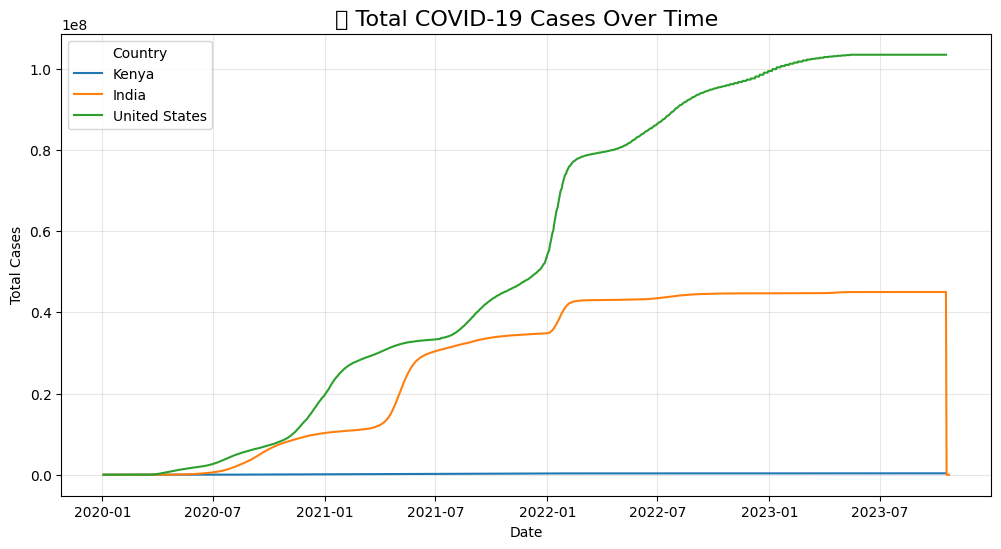

📖 INSIGHT: The US shows a consistently higher curve, reflecting its large population and reporting capacity. Kenya shows a much flatter curve.


In [11]:

# EXPLORATORY DATA ANALYSIS (EDA)
# ---------------------------------------

# 💡 STORY: Let's observe how COVID-19 cases evolved over time in different countries.

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("📈 Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.show()

print("📖 INSIGHT: The US shows a consistently higher curve, reflecting its large population and reporting capacity. Kenya shows a much flatter curve.")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


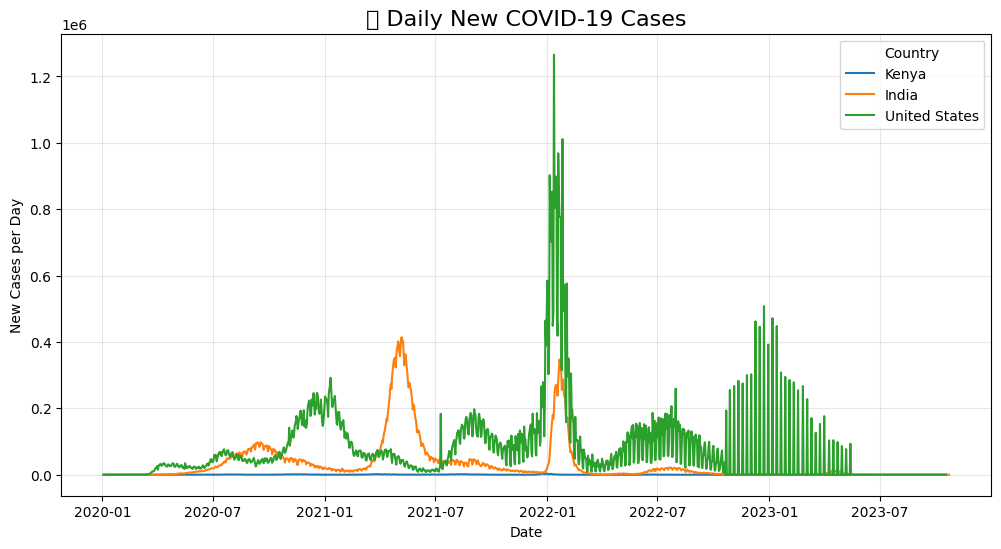

📖 INSIGHT: Notice India’s sharp spike in mid-2021, likely during the Delta wave, while Kenya had smaller but distinct peaks.


In [12]:
# 💡 STORY: Next, let's compare **daily new cases** to observe pandemic peaks.

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title("📊 Daily New COVID-19 Cases", fontsize=16)
plt.xlabel("Date")
plt.ylabel("New Cases per Day")
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.show()

print("📖 INSIGHT: Notice The US sharp spike in 2022, while Kenya had little or no but distinct peaks.")


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


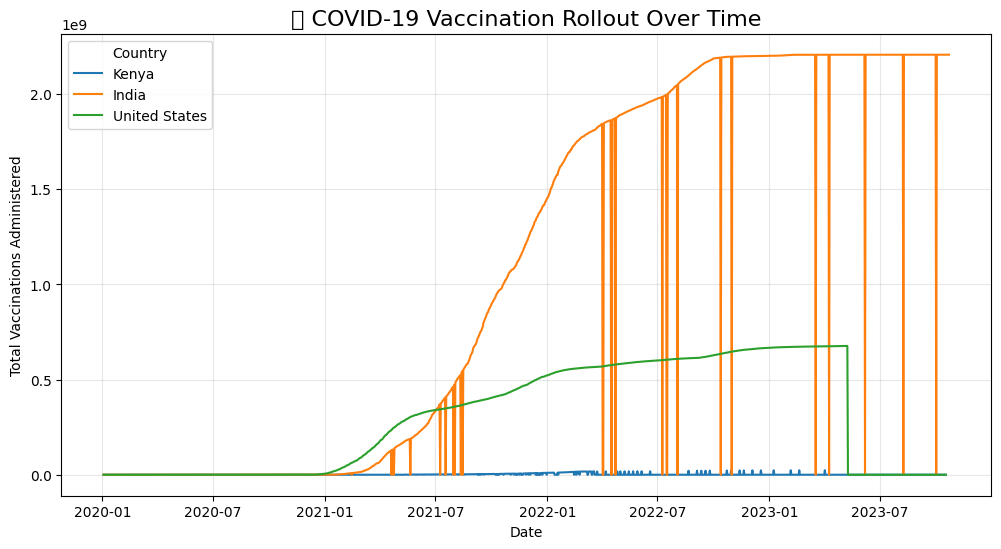

📖 INSIGHT: The US shows a rapid rise in vaccinations, while Kenya’s rollout was slower but steady.


In [14]:
# VACCINATION TRENDS
# ---------------------------------------

plt.figure(figsize=(12,6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("💉 COVID-19 Vaccination Rollout Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations Administered")
plt.legend(title="Country")
plt.grid(alpha=0.3)
plt.show()

print("📖 INSIGHT:India a rapid rise in vaccinations, while Kenya’s rollout was slower but steady.")


In [15]:
#OPTIONAL – CHOROPLETH MAP (GLOBAL VIEW)
# ---------------------------------------

fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    title="🌍 Global COVID-19 Total Cases (Latest Date)",
                    color_continuous_scale="Reds")
fig.show()
